In [256]:
import numpy as np
from numpy import linalg as LA
import math

def GetEigen_WithWeights (Prov_mat, Cons_mat, Prov_Weight, Cons_Weight):
    dim = dim = int(math.sqrt(Prov_mat.size))
    union_mat = Prov_mat*Prov_Weight + Cons_mat*Cons_Weight
    row_sum = np.sum(union_mat,axis = 1)
    col_sum = np.sum(union_mat,axis = 0)
    deg_mat = np.diag(np.concatenate((col_sum,row_sum)))
    adj_mat = np.block([[np.zeros((dim,dim)),union_mat.T], [union_mat, np.zeros((dim,dim))]])
    laplacian = np.matrix(deg_mat-adj_mat)
    w,v = LA.eig(laplacian)
    #print(np.around(v,4),np.around(w,4))
    fiedler_idx = np.argsort(w)[1]
    #print(Cons_Weight,fiedler_idx,v)
    fiedler_value = w[fiedler_idx]
    fiedler_vector = v[:,fiedler_idx]
    return fiedler_value,fiedler_vector

In [257]:
Provider_weight = 1
Consumer_weights = [1.2, 1.5, 2, 3, 4, 5, 10, 25]

## observer

In [258]:
provider_str = """
1	0	0	0	0	0	0   0
1	1	0	0	0	0	0   0
0	1	1	0	0	0	0   0
0	0	0	1	0	0	0   0
0	0	0	1	1	0	0   0
0	0	0	0	0	1	0   0
0	0	0	0	0	0	1   0
0	0	0	0	0	0	0   1
"""

consumer_str = """
0	0	0	1	0	0	0   0
0	0	1	0	0	0	0   0
0	0	0	0	0	0	0   0
0	0	0	0	0	1	1   0
1	0	0	0	0	0	0   0
0	0	0	0	0	0	0   1
0	0	0	0	0	0	0   1
0	0	0	0	0	0	0   0
"""

mat = np.fromstring(provider_str, dtype=int, sep='\t')  # Matrix mat elements from mstring
dim = int(math.sqrt(mat.size))    # Matrix Dimension dim from matrix mat
provider_mat = np.reshape(mat, (dim, dim))  # reshape Matrix mat to square

mat = np.fromstring(consumer_str, dtype=int, sep='\t')  # Matrix mat elements from mstring
consumer_mat = np.reshape(mat, (dim, dim))  # reshape Matrix mat to square

In [259]:
f_vals = []
f_vecs = []
for cons_w in Consumer_weights:
    f_val,f_vec = GetEigen_WithWeights(provider_mat,consumer_mat,Provider_weight,cons_w)
    #print(cons_w,f_vec)
    f_vals.append(f_val)
    f_vecs.append(f_vec.A1.tolist())

In [260]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'orange' if val < 0 else 'green'
    return 'background-color: %s' % color
vheader = ['Weight {}: '.format(i) + str(x) for i,x in zip(Consumer_weights,np.around(f_vals,3))]
header = ['S{}'.format(i) for i in range(1, dim+1)]
indx = ['F{}'.format(i) for i in range(1, dim+1)]
res_df = pd.DataFrame(np.around(f_vecs,5).T, columns= vheader, index = header+indx)
pd.options.display.max_colwidth = 130
res=res_df.style.\
    applymap (color_negative_red).\
    set_caption("Observer Fiedler EIGENVALUES & EIGENVECTORS")
#display(res) 

## Command

In [261]:
provider_str = """
1	1	0	0	0
0	1	0	0	0
0	0	1	1	0
0	0	0	1	0
0	0	0	0	1
"""
consumer_str = """
0	0	0	0	1
0	0	0	0	0
0	1	0	0	0
0	0	0	0	0
0	0	0	0	0
"""
mat = np.fromstring(provider_str, dtype=int, sep='\t')  # Matrix mat elements from mstring
dim = int(math.sqrt(mat.size))    # Matrix Dimension dim from matrix mat
provider_mat = np.reshape(mat, (dim, dim))  # reshape Matrix mat to square

mat = np.fromstring(consumer_str, dtype=int, sep='\t')  # Matrix mat elements from mstring
consumer_mat = np.reshape(mat, (dim, dim))  # reshape Matrix mat to square

f2_vals = []
f2_vecs = []
for cons_w in Consumer_weights:
    f_val,f_vec = GetEigen_WithWeights(provider_mat,consumer_mat,Provider_weight,cons_w)
    #print(cons_w,f_vec)
    f2_vals.append(f_val)
    f2_vecs.append(f_vec.A1.tolist())

vheader = ['Weight {}: '.format(i) + str(x) for i,x in zip(Consumer_weights,np.around(f2_vals,3))]
header = ['S{}'.format(i) for i in range(1, dim+1)]
indx = ['F{}'.format(i) for i in range(1, dim+1)]
res_df = pd.DataFrame(np.around(f2_vecs,5).T, columns= vheader, index = header+indx)
pd.options.display.max_colwidth = 130
res1=res_df.style.\
    applymap (color_negative_red).\
    set_caption("Command Fiedler EIGENVALUES & EIGENVECTORS")

,Weight 1.2: 0.096,Weight 1.5: 0.102,Weight 2: 0.107,Weight 3: 0.114,Weight 4: 0.117,Weight 5: 0.119,Weight 10: 0.124,Weight 25: 0.127
S1,-0.1648,-0.1601,-0.15512,0.14987,0.14715,-0.14548,0.14209,-0.14002
S2,-0.34014,-0.34281,-0.34572,0.34894,0.35068,-0.35178,0.3541,-0.3556
S3,-0.33561,-0.33282,-0.32914,0.32439,0.32154,-0.31966,0.31547,-0.31267
S4,-0.01861,-0.01935,-0.02027,0.02139,0.02204,-0.02247,0.02341,-0.02404
S5,-0.11993,-0.1264,-0.13354,0.14141,0.14561,-0.14821,0.15359,-0.1569
S6,0.22435,0.22224,0.21985,-0.21709,-0.21555,0.21457,-0.21246,0.21109
S7,0.22435,0.22224,0.21985,-0.21709,-0.21555,0.21457,-0.21246,0.21109
S8,0.30929,0.30582,0.30194,-0.29755,-0.29514,0.29361,-0.29035,0.28826
F1,-0.08896,-0.07886,-0.06764,0.05507,0.04819,-0.04384,0.03459,-0.02864
F2,-0.29246,-0.29488,-0.29777,0.30125,0.30325,-0.30456,0.30742,-0.30932


,Weight 1.2: 0.187,Weight 1.5: 0.202,Weight 2: 0.22,Weight 3: 0.24,Weight 4: 0.251,Weight 5: 0.258,Weight 10: 0.273,Weight 25: 0.281
S1,-0.30134,0.31871,0.33892,-0.36219,0.37494,0.38292,-0.39951,-0.40978
S2,0.01316,-0.02843,-0.04609,0.06631,-0.07736,-0.08426,0.09858,0.10743
S3,0.27516,-0.26104,-0.24327,0.22092,-0.20773,-0.19912,0.18024,0.16786
S4,0.38338,-0.38287,-0.3815,0.3788,-0.37678,-0.3753,0.37166,0.36899
S5,-0.37525,0.3653,0.35301,-0.33782,0.32897,0.32323,-0.31073,-0.3026
F1,-0.24508,0.2542,0.26426,-0.2751,0.28067,0.28402,-0.29062,-0.29445
F2,0.01618,-0.03564,-0.05911,0.0873,-0.10334,-0.11359,0.13551,0.14951
F3,0.22379,-0.2082,-0.18968,0.1678,-0.15551,-0.14769,0.13112,0.12062
F4,0.4714,-0.48004,-0.48927,0.49872,-0.50333,-0.50598,0.5109,0.51352
F5,-0.4614,0.45801,0.45274,-0.44477,0.43946,0.43577,-0.42715,-0.42112


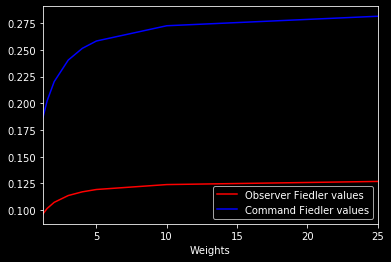

In [262]:
ax = plt.gca()
df = pd.DataFrame({
    'Weights':Consumer_weights,
    'Observer Fiedler values':f_vals,
    'Command Fiedler values':f2_vals})
df.plot(kind='line',x='Weights',y='Observer Fiedler values',color='red', ax=ax)
df.plot(kind='line',x='Weights',y='Command Fiedler values',color='blue', ax=ax)
display(res) 
display(res1) 